In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,precision_recall_curve,f1_score


In [2]:
class Image_Extraction_from_file:
    def __init__(self,path_folder):
        self.path_folder = path_folder
        self.image_data = []


    def Get_images(self,image_path):
        image = Image.open(image_path).convert("RGB")
        image = image.resize((256, 256))
        image_array = np.array(image.getdata(),dtype=np.int32)/255
        self.image_data.append(image_array)



    def Extract_from_folder(self):
        category_name = []
        self.image_data = []
        for root, dirs, files in os.walk(self.path_folder):
            for name in files:
                if name.lower().endswith((".jpg", ".jpeg", ".png")):
                    image_path = os.path.join(root, name)
                    self.Get_images(image_path)
                    subdir_name = os.path.basename(root)
                    category_name.append(subdir_name)

        self.image_data = np.array(self.image_data)
        category_name = np.array(category_name).reshape(-1, 1)
        self.X_images = self.image_data.astype(float)
        n = self.X_images.shape[0]
        self.X_images = self.X_images.reshape((n,256,256,3))
        return self.X_images,category_name

In [3]:
path = 'C:\\CSE\\DAV\\DAV\\cnn\\veggie_heap_testing'
test = Image_Extraction_from_file(path)
x_te,y_te = test.Extract_from_folder()

In [4]:
path = 'C:\\CSE\\DAV\\DAV\\cnn\\veggie_heap_training'
train = Image_Extraction_from_file(path)
x_tr,y_tr = train.Extract_from_folder()

In [5]:
label_encoder = LabelEncoder()
y_te = label_encoder.fit_transform(y_te.ravel())
y_tr = label_encoder.fit_transform(y_tr.ravel())
y_te = to_categorical(y_te)
y_tr = to_categorical(y_tr)


In [6]:
c = y_tr.shape[1]

In [7]:
CNN = tf.keras.Sequential([
    layers.Conv2D(15, (3,3), activation="relu", padding="same", input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(60, (3,3), activation="relu", strides=2, padding="same"),
    layers.MaxPooling2D(pool_size=(2,2)),


    layers.Flatten(),
    layers.Dense(180, activation="relu"),
    layers.Dense(90, activation="relu"),
    layers.Dense(30,activation="relu"),
    layers.Dense(c, activation="softmax")  
])

c:\Users\chira\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 15)   │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 15)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 60)     │         8,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61440)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 180)            │    11,059,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 90)             │        16,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         2,730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           372 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,087,352 (42.29 MB)

 Trainable params: 11,087,352 (42.29 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=2,restore_best_weights=True )


In [11]:
history = CNN.fit(x_tr, y_tr, epochs=20, batch_size=32, validation_data=(x_te, y_te),callbacks = [early_stopping])

Epoch 1/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 81s 250ms/step - accuracy: 0.5593 - loss: 1.3445 - val_accuracy: 0.5796 - val_loss: 1.4857
Epoch 2/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 47s 152ms/step - accuracy: 0.9292 - loss: 0.2275 - val_accuracy: 0.5747 - val_loss: 2.6348
Epoch 3/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - accuracy: 0.9590 - loss: 0.1183 - val_accuracy: 0.6052 - val_loss: 2.2319
Epoch 4/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 44s 144ms/step - accuracy: 0.9750 - loss: 0.0763 - val_accuracy: 0.6209 - val_loss: 1.8849
Epoch 5/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 44s 142ms/step - accuracy: 0.9888 - loss: 0.0345 - val_accuracy: 0.6984 - val_loss: 1.2508
Epoch 6/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 45s 141ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.5858 - val_loss: 2.5116
Epoch 7/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 44s 142ms/step - accuracy: 0.9943 - loss: 0.0228 - val_accuracy: 0.6704 - val_loss: 1.6163


In [12]:
type(history)

keras.src.callbacks.history.History

In [13]:
loss, accuracy = CNN.evaluate(x_te, y_te)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7802 - loss: 0.9073
Test Accuracy: 69.84%


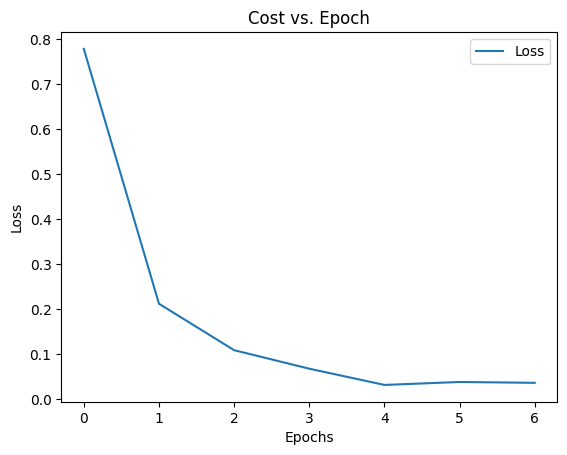

In [14]:

plt.plot(history.history['loss'], label='Loss')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cost vs. Epoch')
plt.legend()
plt.show()


In [15]:
y_predict = CNN.predict(x_te)
y_predict = np.argmax(y_predict, axis=1)
y_act = np.argmax(y_te, axis=1)


76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


In [16]:
class_names = ["Apatosaur_Aphie_Apples", "Bluplocephalus Bob's Blueberries", "Cherizinoasaur Cher's Cherries", "Corythosaurus Cory's Corn","Grapthorina Greta's Grapes", "Pachycephalosaurus Perry's Peaches", "Pepteranodon Pep's Peppers", "Potoceratops Pott's Potatoes", "Rhaspdodon Ribery's Raspberries", "Stribecosaurus Stan's Strawberries","Thyreosaur Tim's Thyme","vacation_photos"]

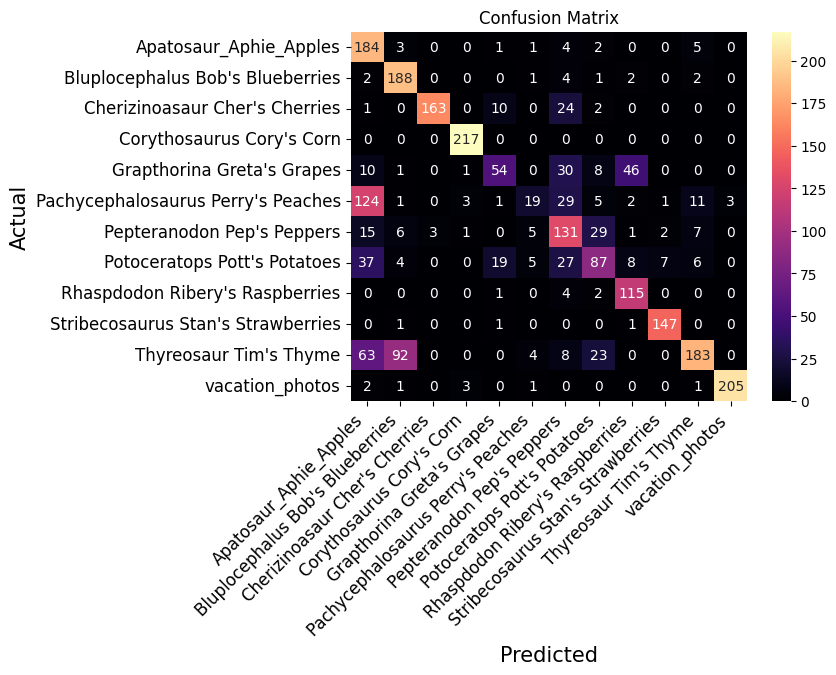

In [17]:
matrix = confusion_matrix(y_true=y_act,y_pred=y_predict)
sns.heatmap(matrix, annot=True, fmt='d', cmap='magma', xticklabels=class_names, yticklabels=class_names)
plt.xticks(rotation=45, ha="right", fontsize=12) 
plt.yticks(fontsize=12)
plt.xlabel('Predicted',fontsize = 15)
plt.ylabel('Actual',fontsize = 15)
plt.title('Confusion Matrix')
plt.show()

In [18]:
f1_s = f1_score(y_true=y_act,y_pred=y_predict,average="macro")
acc= accuracy_score(y_true=y_act,y_pred=y_predict)
rec = recall_score(y_true=y_act,y_pred=y_predict,average = "macro")
pres = precision_score(y_true=y_act,y_pred=y_predict,average = "macro")
performance_metrics  = np.array([[acc,pres],[rec,f1_s]])
labels = [["Accuracy", "Precision"],[ "Recall", "F1 Score"]]


In [19]:
print(f"Accuracy = {acc}")
print(f"F1 = {f1_s}")
print(f"Recall = {rec}")
print(f"Precision = {pres}")


Accuracy = 0.6984323432343235
F1 = 0.6837288752734939
Recall = 0.7163465228576875
Precision = 0.7189334474141753
